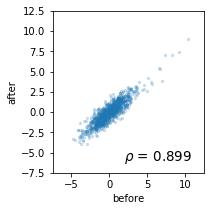

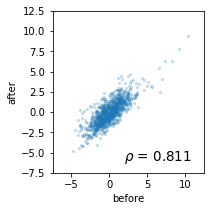

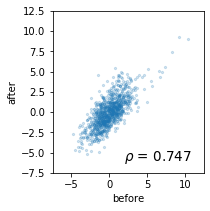

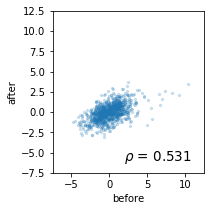

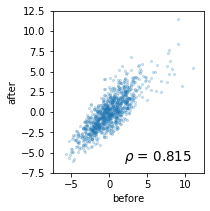

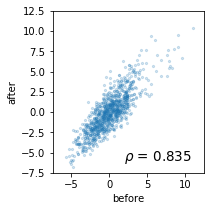

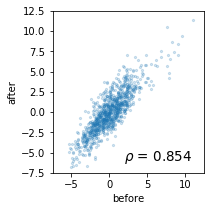

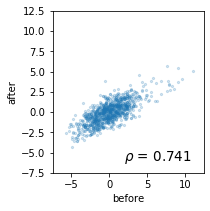

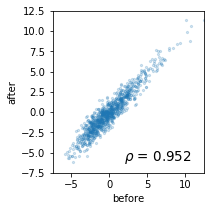

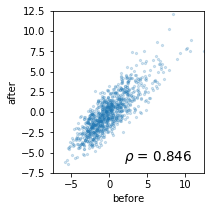

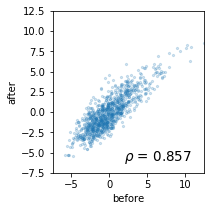

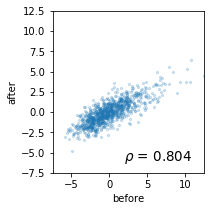

In [1]:
import torch
import numpy
import cv2
import torchvision
import matplotlib
from matplotlib import pyplot as plt

torch.manual_seed(1)

mean = torch.Tensor([0.485, 0.456, 0.406]).reshape(1,-1,1,1)
std  = torch.Tensor([0.229, 0.224, 0.225]).reshape(1,-1,1,1)

for image in 'ABC':

    for reinit in '1234':

        modelbefore = torchvision.models.resnet34(pretrained=True); modelbefore.eval()
        modelrand = torchvision.models.resnet34(pretrained=False); modelrand.eval()
        modelafter = torchvision.models.resnet34(pretrained=True); modelafter.eval()

        #print(modelbefore)
        
        if reinit == '1':
            modelafter.layer1[2].conv2 = modelrand.layer1[2].conv2
        if reinit == '2':
            modelafter.layer2[2].conv2 = modelrand.layer2[2].conv2
        if reinit == '3':
            modelafter.layer3[2].conv2 = modelrand.layer3[2].conv2
        if reinit == '4':
            modelafter.layer4[2].conv2 = modelrand.layer4[2].conv2

        if image == 'A': img = numpy.array(cv2.imread('ILSVRC2012_val_00017700.JPEG'))[...,::-1]/255.0
        if image == 'B': img = numpy.array(cv2.imread('ILSVRC2012_val_00008161.JPEG'))[...,::-1]/255.0
        if image == 'C': img = numpy.array(cv2.imread('ILSVRC2012_val_00026451.JPEG'))[...,::-1]/255.0

        X = (torch.FloatTensor(img[numpy.newaxis].transpose([0,3,1,2])*1) - mean) / std
        
        Y1 = modelbefore(X)
        Y2 = modelafter(X)
        
        y1n,y2n = Y1.data.numpy(),Y2.data.numpy()
        plt.figure(figsize=(3,3))
        plt.subplots_adjust(left=0.25,bottom=0.2,top=0.95,right=0.95)
        plt.scatter(y1n,y2n,alpha=0.2,s=5)
        plt.xlabel('before')
        plt.ylabel('after')
        plt.xlim(-7.5,12.5)
        plt.ylim(-7.5,12.5)
        plt.text(2,-6,r'$\rho$ = %.3f'%numpy.corrcoef(y1n,y2n)[1,0],fontsize=13.5)
        plt.savefig('out/%s-%s.png'%(image,reinit))
